# Assignment 2  - Exploratory Data Analysis

In [1]:
import pandas as p
import numpy as np

##### 1. Reading The File

In [289]:
data=p.read_csv("data.csv")# Read csv file
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),NaN,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


##### 2. Fill/Drop NaN Values Using Appropriate Method

In [6]:
data.isna()# check for NULL Values

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11503 non-null  float64
 5   Engine Cylinders   11411 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [142]:
data.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11503
Engine Cylinders     11411
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [143]:
tmp=data.dropna()

In [25]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              11914 non-null  int64  
 1   Engine HP         11503 non-null  float64
 2   Engine Cylinders  11411 non-null  float64
 3   Number of Doors   11908 non-null  float64
 4   highway MPG       11914 non-null  int64  
 5   city mpg          11914 non-null  int64  
 6   Popularity        11914 non-null  int64  
 7   MSRP              11914 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 744.8 KB


In [144]:
tmp=data.select_dtypes(np.number)    #Selection of only numeric values

In [84]:
tmp

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,NaN,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [164]:
f1=data.groupby(['Make','Model']) #Grouping based off Make And Model to fill Null Values in Engine

In [291]:
type(data)
data['Engine HP']=f1['Engine HP'].transform(lambda k :k.fillna(k.mean()))
data['Engine Cylinders']=f1['Engine Cylinders'].transform(lambda x:x.fillna(x.mode))
f1['Engine HP'].mean().count()                       # So Mean Makes more sense here to fill nan values as we categorise the data into make and model and each make with specific model must have similar HP

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11876 non-null  float64
 5   Engine Cylinders   11914 non-null  object 
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5

In [188]:
tmp=data.select_dtypes(np.number)

tmp=tmp.dropna()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11875 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             11875 non-null  int64  
 1   Engine HP        11875 non-null  float64
 2   Number of Doors  11875 non-null  float64
 3   highway MPG      11875 non-null  int64  
 4   city mpg         11875 non-null  int64  
 5   Popularity       11875 non-null  int64  
 6   MSRP             11875 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 742.2 KB


##### 3.Check For Outliers in the given Data

Acura                 AxesSubplot(0.1,0.808537;0.097561x0.0914634)
Alfa Romeo       AxesSubplot(0.217073,0.808537;0.097561x0.0914634)
Aston Martin     AxesSubplot(0.334146,0.808537;0.097561x0.0914634)
Audi              AxesSubplot(0.45122,0.808537;0.097561x0.0914634)
BMW              AxesSubplot(0.568293,0.808537;0.097561x0.0914634)
Bentley          AxesSubplot(0.685366,0.808537;0.097561x0.0914634)
Bugatti          AxesSubplot(0.802439,0.808537;0.097561x0.0914634)
Buick                  AxesSubplot(0.1,0.69878;0.097561x0.0914634)
Cadillac          AxesSubplot(0.217073,0.69878;0.097561x0.0914634)
Chevrolet         AxesSubplot(0.334146,0.69878;0.097561x0.0914634)
Chrysler           AxesSubplot(0.45122,0.69878;0.097561x0.0914634)
Dodge             AxesSubplot(0.568293,0.69878;0.097561x0.0914634)
FIAT              AxesSubplot(0.685366,0.69878;0.097561x0.0914634)
Ferrari           AxesSubplot(0.802439,0.69878;0.097561x0.0914634)
Ford                  AxesSubplot(0.1,0.589024;0.097561x0.0914

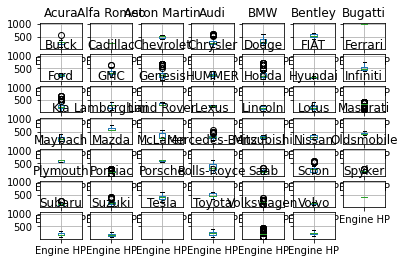

In [205]:
# Checking for Outliers
col=['Make','Engine HP']
df=data[col]
k=df.groupby('Make')
k.boxplot()

In [248]:
#Function to compute inter quartile number
def iqr(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    return iqr,q3,q1

In [220]:
# Sanity checks for Outlier If Any we will replace the data 
iqr,q1,q3=iqr(df,'Engine HP')
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df[(df['Engine HP']<lower) & (df['Engine HP']>upper)]
# This shows that there are no outliers in the 'Engine HP ' column
(df['Engine HP']<lower)


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Engine HP, Length: 11914, dtype: bool

In [224]:
df[(df['Engine HP']>lower) & (df['Engine HP']<upper)] #print non outlier value

,Make,Engine HP
0,BMW,335.0
1,BMW,300.0
2,BMW,300.0
3,BMW,230.0
4,BMW,230.0
...,...,...
11909,Acura,300.0
11910,Acura,300.0
11911,Acura,300.0
11912,Acura,300.0


Acura                 AxesSubplot(0.1,0.808537;0.097561x0.0914634)
Alfa Romeo       AxesSubplot(0.217073,0.808537;0.097561x0.0914634)
Aston Martin     AxesSubplot(0.334146,0.808537;0.097561x0.0914634)
Audi              AxesSubplot(0.45122,0.808537;0.097561x0.0914634)
BMW              AxesSubplot(0.568293,0.808537;0.097561x0.0914634)
Bentley          AxesSubplot(0.685366,0.808537;0.097561x0.0914634)
Bugatti          AxesSubplot(0.802439,0.808537;0.097561x0.0914634)
Buick                  AxesSubplot(0.1,0.69878;0.097561x0.0914634)
Cadillac          AxesSubplot(0.217073,0.69878;0.097561x0.0914634)
Chevrolet         AxesSubplot(0.334146,0.69878;0.097561x0.0914634)
Chrysler           AxesSubplot(0.45122,0.69878;0.097561x0.0914634)
Dodge             AxesSubplot(0.568293,0.69878;0.097561x0.0914634)
FIAT              AxesSubplot(0.685366,0.69878;0.097561x0.0914634)
Ferrari           AxesSubplot(0.802439,0.69878;0.097561x0.0914634)
Ford                  AxesSubplot(0.1,0.589024;0.097561x0.0914

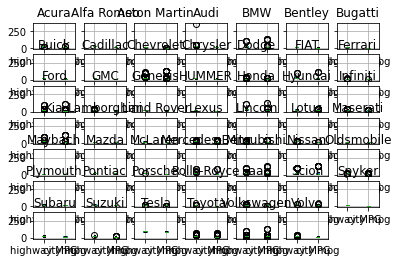

In [247]:
col1=['Make','highway MPG','city mpg']
df1=data[col1]
k1=df1.groupby('Make')
k1.boxplot()

In [240]:
iqr,q1,q3=iqr(df1,'highway MPG')
lower_h=q1-1.5*iqr
upper_h=q3+1.5*iqr

In [250]:
iqr1,q1,q3=iqr(df1,'city mpg')
lower_h=q1-1.5*iqr1
upper_h=q3+1.5*iqr1

In [246]:
df1[(df1['highway MPG']<lower_h)&(df1['highway MPG']>upper_h)]  # NO OUTLIERS PResent

,Make,highway MPG


In [253]:
df1[(df1['city mpg']<lower_h)&(df1['city mpg']>upper_h)] ## NO OUTLIERS PResent

,Make,highway MPG,city mpg


##### 4.Unique Values in the Table

In [256]:

tmp.Year.unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

In [258]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11875 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             11875 non-null  int64  
 1   Engine HP        11875 non-null  float64
 2   Number of Doors  11875 non-null  float64
 3   highway MPG      11875 non-null  int64  
 4   city mpg         11875 non-null  int64  
 5   Popularity       11875 non-null  int64  
 6   MSRP             11875 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 742.2 KB


In [263]:
tmp['Engine HP'].unique()

array([ 335.        ,  300.        ,  230.        ,  320.        ,
        172.        ,  160.        ,  130.        ,  158.        ,
        240.        ,  248.        ,  162.        ,  217.        ,
        184.        ,  295.        ,  115.        ,  140.        ,
        155.        ,  114.        ,  100.        ,  241.        ,
        180.        ,  177.        ,  228.        ,  121.        ,
        148.        ,  194.        ,  218.        ,  161.        ,
        292.        ,  250.        ,  255.        ,  222.        ,
         82.        ,  134.        ,  306.        ,  400.        ,
        425.        ,  350.        ,  332.        ,  268.        ,
        282.        ,  275.        ,  201.        ,  442.        ,
        562.        ,  597.        ,  237.        ,  270.        ,
        445.        ,  443.        ,  302.        ,  322.        ,
        315.        ,  101.        ,  135.        ,  485.        ,
        238.        ,  515.        ,  543.        ,  631.     

In [267]:
tmp['Number of Doors'].unique()

array([2., 4., 3.])

In [269]:
tmp['MSRP'].unique()

array([46135, 40650, 36350, ..., 46120, 50620, 50920], dtype=int64)

In [270]:
data['Model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '09-Mar', '9-4X', '09-May',
       '9-7X', '9000', '900', '90', '911', '928', '929', '940', '944',
       '960', '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Ac

In [272]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [275]:
data['Popularity'].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
       2031,  416,   67,  210, 1715,  376,  549, 1439,  535, 2202,   26,
        481, 5657, 1624, 1720,  520, 1385, 1851, 1158,   61,  640,  873,
          2,  155,  204,   86,  238,  454,  259,  258,  613,  190,  105,
         21,  130, 1391,  820], dtype=int64)

In [277]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [279]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [282]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [287]:
data=data.dropna()

In [ ]:

data.drop(['Market Category'],axis=1)


In [304]:
data=data.dropna()

###### 5.Average of  Engine HP with Manual Transmission Type

In [326]:
gp1=data.groupby(['Transmission Type','Driven_Wheels'])

op1=gp1['Engine HP'].mean()

In [327]:
op1

Transmission Type  Driven_Wheels    
AUTOMATED_MANUAL   all wheel drive      418.424091
                   front wheel drive    191.170191
                   rear wheel drive     481.290323
AUTOMATIC          all wheel drive      276.944495
                   four wheel drive     305.428835
                   front wheel drive    198.066726
                   rear wheel drive     303.369700
DIRECT_DRIVE       front wheel drive    153.498721
                   rear wheel drive     125.428571
MANUAL             all wheel drive      290.901678
                   four wheel drive     182.804555
                   front wheel drive    150.792800
                   rear wheel drive     283.090578
UNKNOWN            four wheel drive     190.000000
                   front wheel drive    125.000000
                   rear wheel drive     181.123482
Name: Engine HP, dtype: float64

In [334]:
op1['MANUAL']['rear wheel drive']

283.0905782000125

##### 6.Min ,Max, Avg for Different car's city mileage

In [339]:
g2=data.groupby(['Make','Vehicle Style'])

In [341]:
g2['city mpg'].mean()

Make   Vehicle Style
Acura  2dr Hatchback    22.178571
       4dr Hatchback    16.000000
       4dr SUV          18.725806
       Coupe            16.600000
       Sedan            20.674419
                          ...    
Volvo  4dr SUV          20.056338
       Convertible      18.666667
       Coupe            16.000000
       Sedan            19.590000
       Wagon            19.285714
Name: city mpg, Length: 286, dtype: float64

In [342]:
g2['city mpg'].median()

Make   Vehicle Style
Acura  2dr Hatchback    22.0
       4dr Hatchback    16.0
       4dr SUV          19.0
       Coupe            16.5
       Sedan            20.0
                        ... 
Volvo  4dr SUV          20.0
       Convertible      19.0
       Coupe            16.0
       Sedan            19.0
       Wagon            19.0
Name: city mpg, Length: 286, dtype: float64

In [343]:
g2['city mpg'].min()

Make   Vehicle Style
Acura  2dr Hatchback    20
       4dr Hatchback    16
       4dr SUV          13
       Coupe            15
       Sedan            15
                        ..
Volvo  4dr SUV          16
       Convertible      18
       Coupe            15
       Sedan            15
       Wagon            15
Name: city mpg, Length: 286, dtype: int64

In [347]:
g2['city mpg'].max()

Make   Vehicle Style
Acura  2dr Hatchback    24
       4dr Hatchback    16
       4dr SUV          20
       Coupe            21
       Sedan            39
                        ..
Volvo  4dr SUV          24
       Convertible      19
       Coupe            17
       Sedan            26
       Wagon            25
Name: city mpg, Length: 286, dtype: int64

##### 7.Quick Plots for visualisation

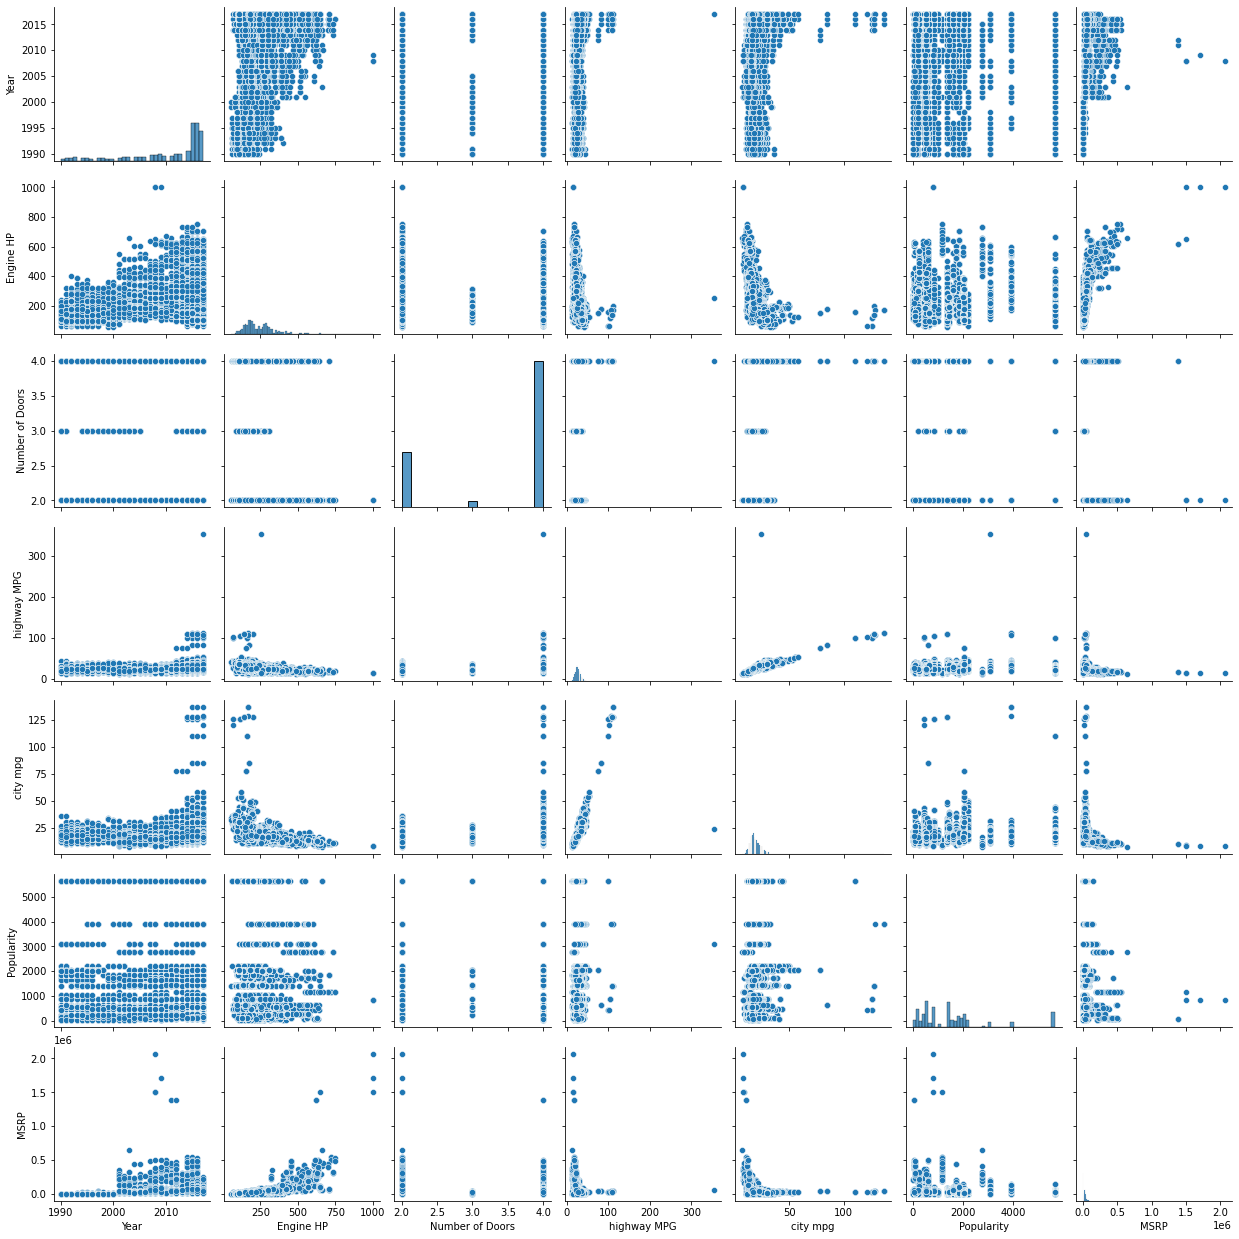

In [346]:
import seaborn as s
s.pairplot(data)